In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [17]:
mushroom = pd.read_csv('mushroom/agaricus-lepiota.csv', header=None)
mushroom


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [22]:
# preprocessing

# encode columns
cols = mushroom.columns.tolist()
le = LabelEncoder()

for col in cols:
    mushroom[col] = le.fit_transform(mushroom[col])

X = mushroom.iloc[:, 1:]
y = mushroom.iloc[:, 0]


0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int64

### Decision Tree

plotting graph


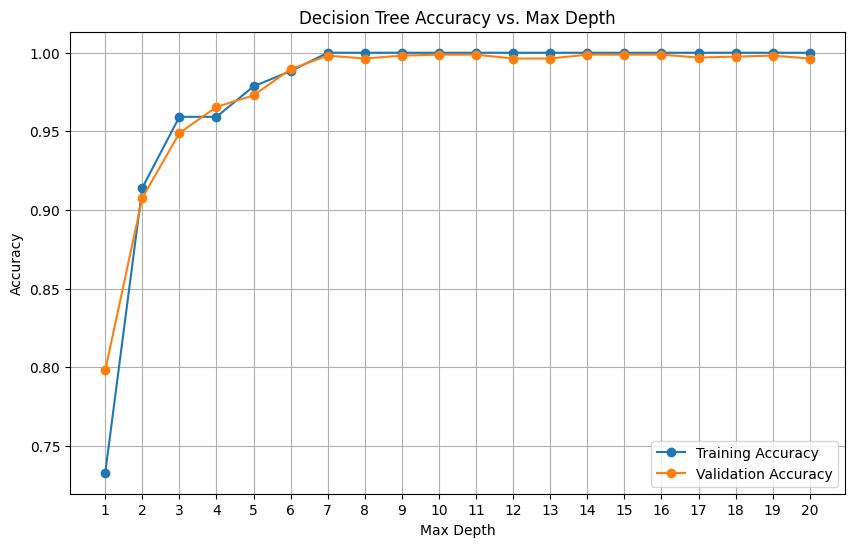

In [23]:
# check max-depth values
max_depth_values = range(1,21)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over max-depth values
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(max_depth_values, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

plotting graph


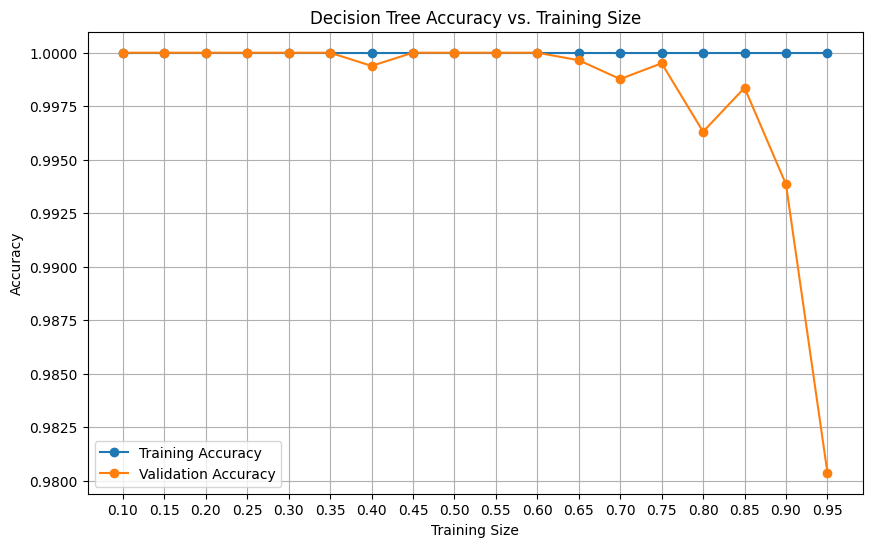

Final Accuracy: 100.0


In [24]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over max-depth values
for size in training_sizes:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=7)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Decision Tree Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')

### Neural Network

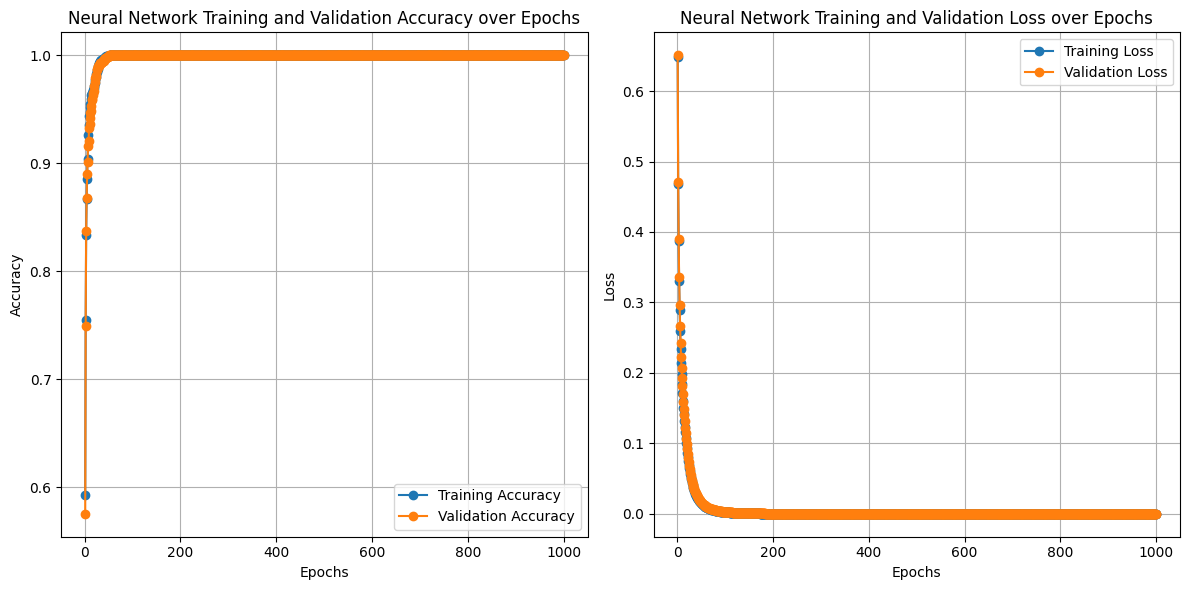

In [25]:
# Initialize empty lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Initialize empty lists to store training and validation loss
train_loss = []
val_loss = []

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000, random_state=42)

for epoch in range(clf.max_iter):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Calculate training and validation accuracy for the current epoch
    train_accuracy.append(clf.score(X_train, y_train))
    val_accuracy.append(clf.score(X_val, y_val))
    
    # Calculate training and validation loss for the current epoch
    train_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    val_loss.append(log_loss(y_val, clf.predict_proba(X_val)))


plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
epochs = np.arange(1, clf.max_iter + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

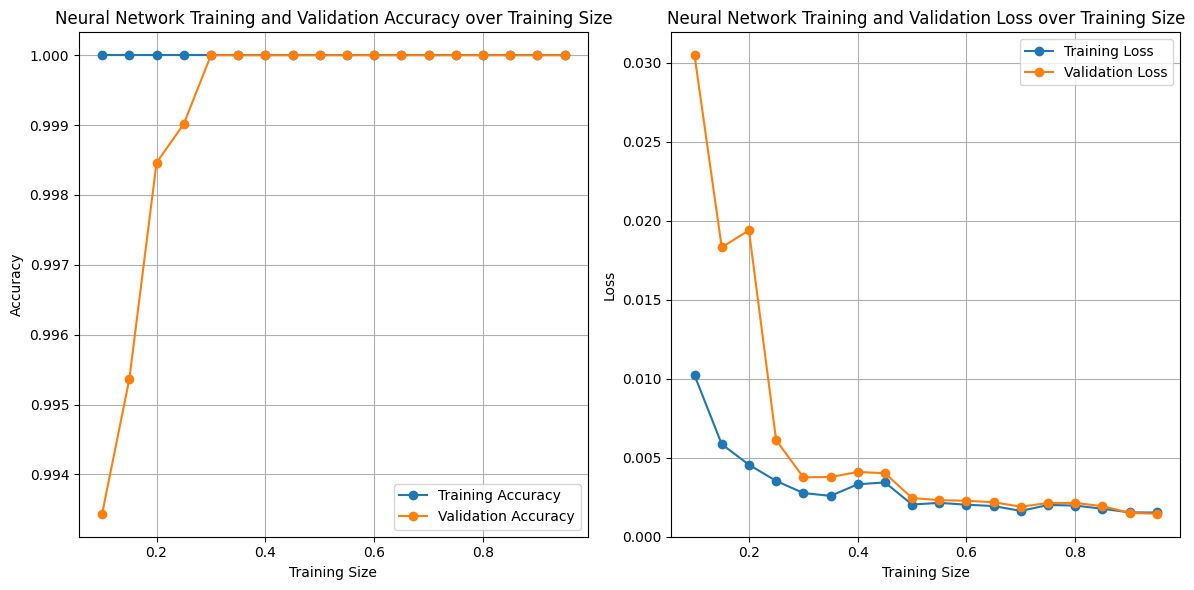

In [26]:
# check training sizes
training_sizes = np.arange(0.1, 1.0, 0.05)

# Initialize empty lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Initialize empty lists to store training and validation loss
train_loss = []
val_loss = []

for size in training_sizes:
    clf = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)
    
    # Calculate training and validation accuracy for the current epoch
    train_accuracy.append(clf.score(X_train, y_train))
    val_accuracy.append(clf.score(X_val, y_val))
    
    # Calculate training and validation loss for the current epoch
    train_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    val_loss.append(log_loss(y_val, clf.predict_proba(X_val)))


plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(training_sizes, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Accuracy over Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(training_sizes, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(training_sizes, val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Loss over Training Size')
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plotting graph


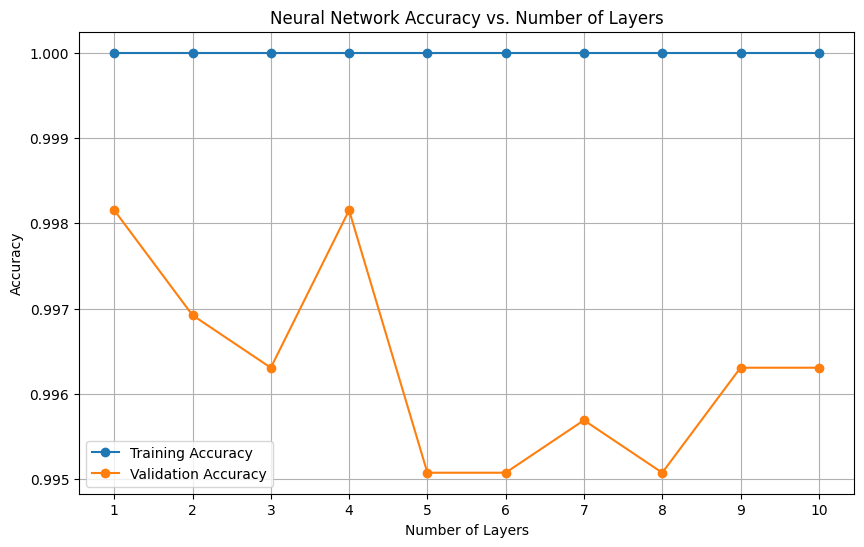

In [27]:
# check number of layers
num_layers = range(1, 11)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over number of layers
for layers in num_layers:
    hidden_layer_sizes = tuple([64] * layers)
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=1000, learning_rate_init=0.001, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(num_layers, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(num_layers, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Accuracy vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.xticks(num_layers)
plt.legend()
plt.grid(True)
plt.show()

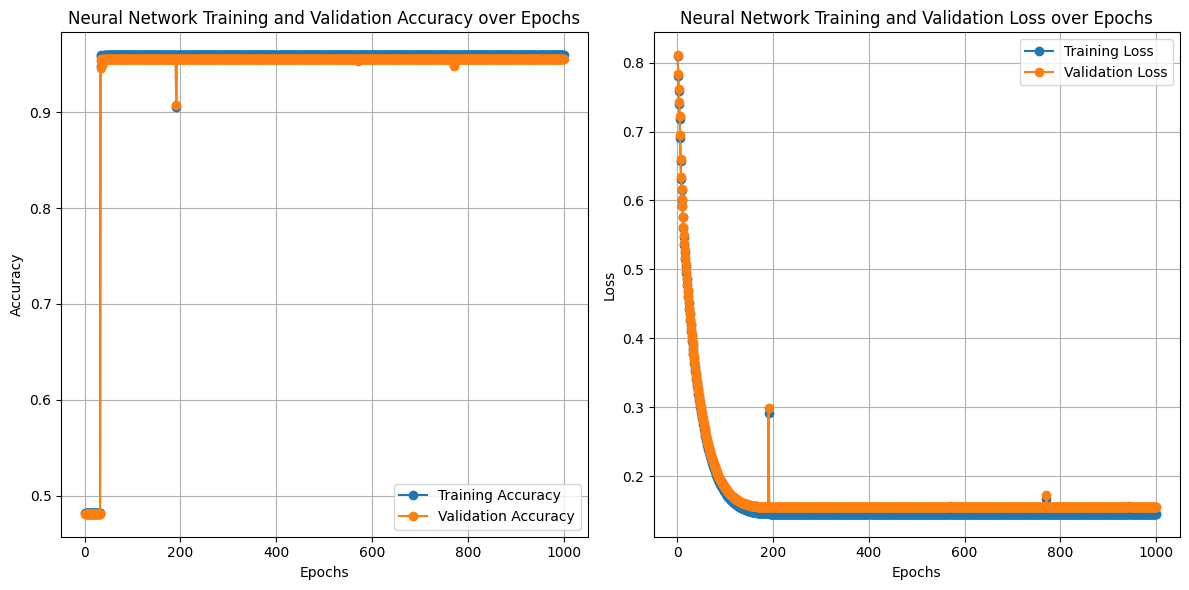

Final Accuracy: 99.63076923076922
Final Loss: 0.15533395326181787


In [28]:
# test on smaller sized layers and with F2 regularization to prevent overfitting
# Initialize empty lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Initialize empty lists to store training and validation loss
train_loss = []
val_loss = []

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(32,16,8,4), activation='relu', max_iter=1000, random_state=42,
                    alpha=0.0001,)

for epoch in range(clf.max_iter):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Calculate training and validation accuracy for the current epoch
    train_accuracy.append(clf.score(X_train, y_train))
    val_accuracy.append(clf.score(X_val, y_val))
    
    # Calculate training and validation loss for the current epoch
    train_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    val_loss.append(log_loss(y_val, clf.predict_proba(X_val)))


plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
epochs = np.arange(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'Final Accuracy: {val_acc[-1] * 100}')
print(f'Final Loss: {val_loss[-1]}')

### Boosting

plotting graph


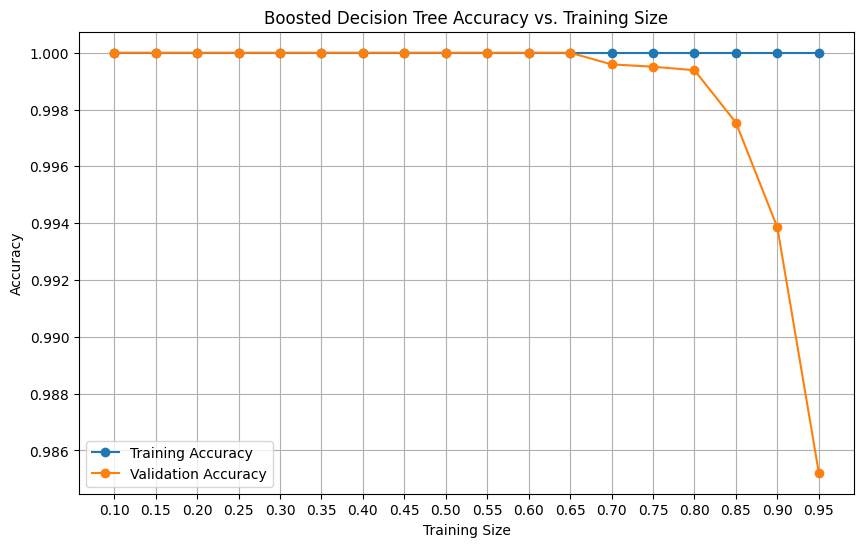

In [29]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over max-depth values
for size in training_sizes:
    base_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    clf = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Boosted Decision Tree Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# check hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],                   # Number of weak learners (estimators)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],               # Learning rate
}


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(base_classifier)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_val)

# get validation accuracy
cross_val_scores = cross_val_score(best_estimator, X_val, y_val, cv=5)
val_accuracy_mean = np.mean(cross_val_scores)

accuracy = accuracy_score(y_val, y_pred)
print("Best Parameters:", best_params)
print("Accuracy of Best Estimator:", accuracy)
print("Validation Accuracy:", val_accuracy_mean)

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Accuracy of Best Estimator: 1.0
Validation Accuracy: 0.9993846153846153


plotting graph


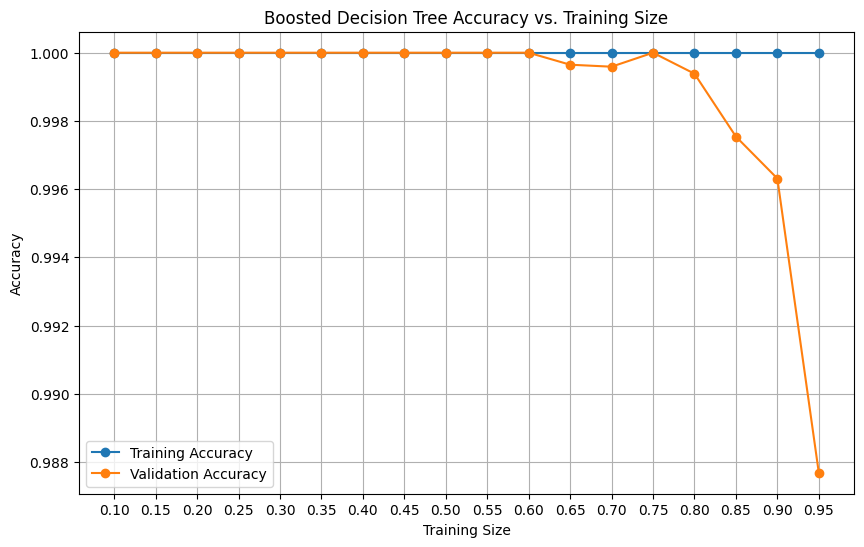

Final Accuracy: 100.0


In [32]:
# check training size again but with best hyperparameters
training_sizes = np.arange(0.1, 1.0, 0.05)

# training and validation accuracies
train_acc = []
val_acc = []

for size in training_sizes:
    base_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    clf = AdaBoostClassifier(base_classifier, n_estimators=100, learning_rate=0.5, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Boosted Decision Tree Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')

### SVM

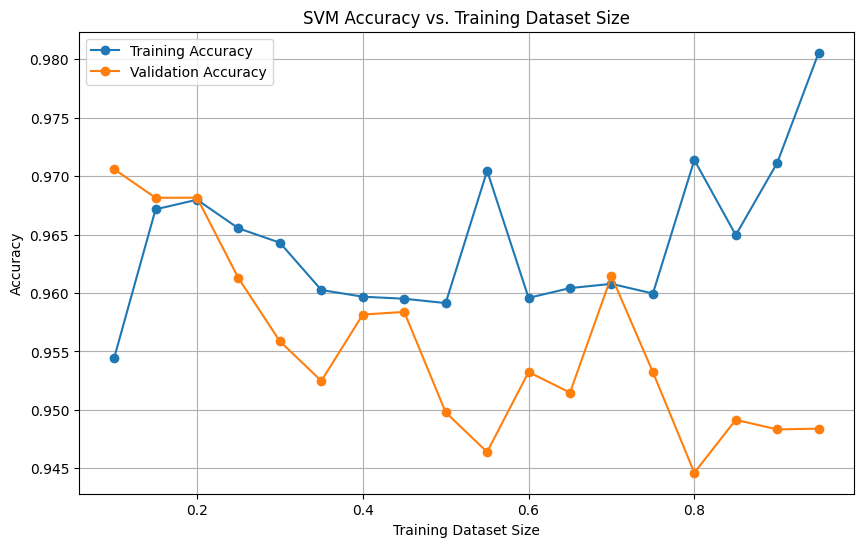

In [33]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    clf = SVC(kernel='linear', random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    y_train_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# find best hyperparameters
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel functions to test
    'C': [0.01, 0.1, 1, 10],
}

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# Create an SVM classifier
clf = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
train_accuracy = best_estimator.score(X_train, y_train)

# Calculate mean cross-validation accuracy
cross_val_scores = cross_val_score(best_estimator, X_val, y_val, cv=5)
val_accuracy_mean = np.mean(cross_val_scores)

print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy_mean)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 1.0
Validation Accuracy: 0.9950769230769231


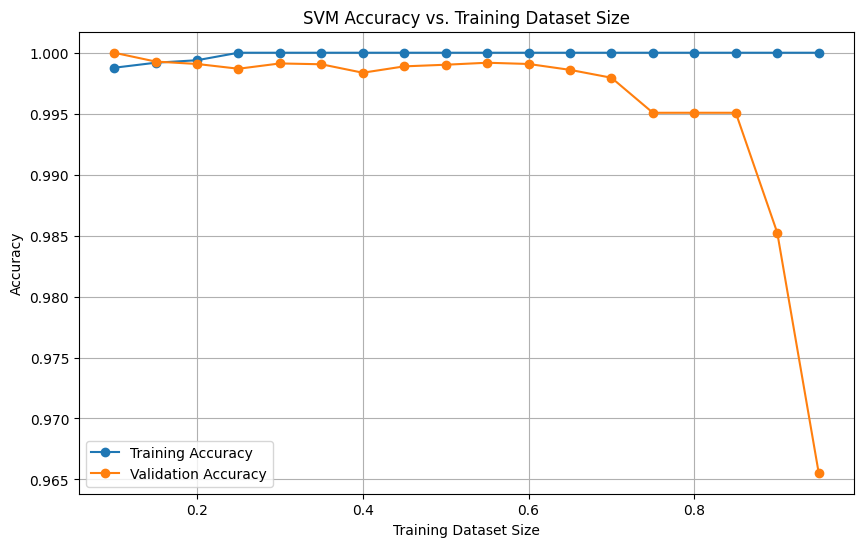

Final Accuracy: 100.0


In [37]:
# test on training sizes with best hyperparameters
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    clf = SVC(kernel='rbf', C=10, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    y_train_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')

### KNN

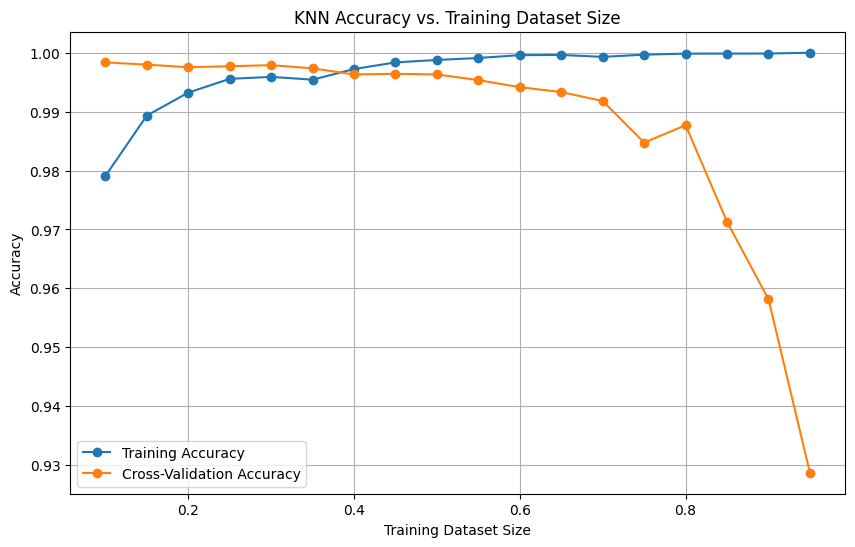

In [38]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of k
    'weights': ['uniform', 'distance'],  # Weighting schemes
}

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

clf = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=8)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
train_accuracy = best_estimator.score(X_train, y_train)

# Calculate mean cross-validation accuracy
cross_val_scores = cross_val_score(best_estimator, X_val, y_val, cv=8)
val_accuracy_mean = np.mean(cross_val_scores)

print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy_mean)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Training Accuracy: 0.9998461301738729
Validation Accuracy: 0.9913823287935863


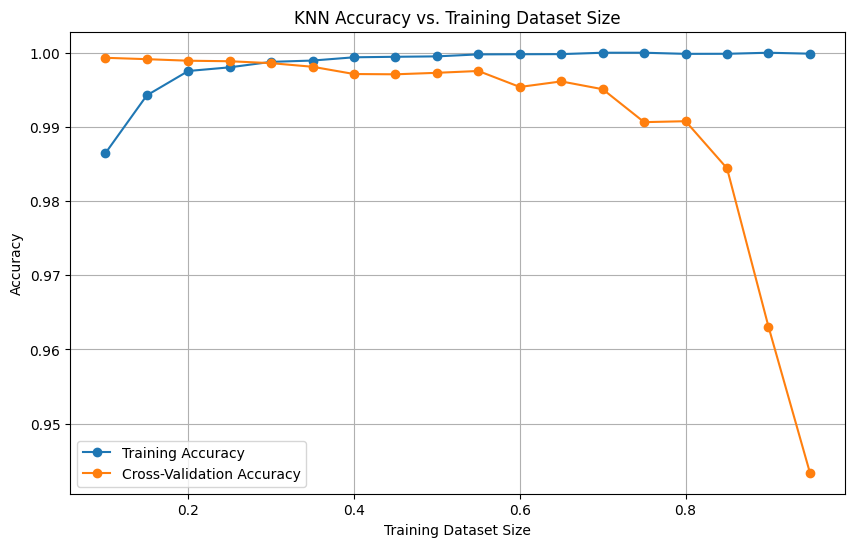

Final Accuracy: 99.93162859891925


In [40]:
# test with best hyperparameters
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')